In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blog-authorship-corpus/blogtext.csv


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
data =  pd.read_csv('/kaggle/input/blog-authorship-corpus/blogtext.csv')

In [4]:
data.head().isnull().sum()   

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [7]:
newdata = data.head(2000)

In [6]:
# data['Word_count'] = data['text'].apply(count_words)

In [125]:
# zero_word_count_tuples = find_tuples_with_zero_word_count(data)
# def find_tuples_with_zero_word_count(data):
#     return data[data['Word_count'] == 0]
# indices_to_delete = zero_word_count_tuples.index
# data.drop(indices_to_delete, inplace=True)

In [74]:
# filtered_data = data[data['Word_count'] > 200]
# data = filtered_data.copy()

In [75]:
# newdata = data[(data['Word_count'] > 200) & (data['Word_count'] <= 202)]
# newdata.shape

(2182, 8)

In [8]:
newdata.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [10]:
def remove_unwanted_characters(text):
    # Remove non-alphanumeric characters and symbols
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text
def convert_to_lowercase(text):
    # Convert text to lowercase
    lowercase_text = text.lower()
    return lowercase_text
def remove_unwanted_spaces(text):
    # Remove extra whitespaces
    cleaned_text = ' '.join(text.split())
    return cleaned_text

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def remove_stopwords(text):
    # Tokenize the text and remove stopwords
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

In [12]:
newdata['text'] = newdata['text'].apply(remove_unwanted_characters)
newdata['text'] = newdata['text'].apply(convert_to_lowercase)
newdata['text'] = newdata['text'].apply(remove_unwanted_spaces)
newdata['text'] = newdata['text'].apply(remove_stopwords)

In [13]:
# from sklearn.model_selection import train_test_split
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression,LinearRegression
# from sklearn.metrics import classification_report
# X = new_data['text']

# # Labels
# y = new_data['gender']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Create a Count Vectorizer with ngram_range=(1, 2)
# vectorizer = CountVectorizer(ngram_range=(1, 2))

# # Vectorize training features
# X_train_vectorized = vectorizer.fit_transform(X_train)

# # Vectorize testing features
# X_test_vectorized = vectorizer.transform(X_test)
# # Get the feature names (terms) from the vectorizer
# feature_names = vectorizer.get_feature_names_out()


# # Create a logistic regression classifier
# classifier = LogisticRegression()

# # Wrap the classifier in the OneVsRestClassifier
# classifier = OneVsRestClassifier(classifier)

# # Train the classifier on the transformed training data
# classifier.fit(X_train_vectorized, y_train)
# y_pred = classifier.predict(X_test_vectorized)

# print(classification_report(y_test,y_pred))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
le_gender = LabelEncoder()
newdata['gender_encoded'] = le_gender.fit_transform(newdata['gender'])

# Features (text data) and labels
X = newdata['text']
y = newdata['gender_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Count Vectorizer with ngram_range=(1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Vectorize training features
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize testing features
X_test_vectorized = vectorizer.transform(X_test)

# Create a logistic regression classifier
classifier = LogisticRegression(max_iter=10000)

# Train the classifier on the transformed training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_gender.classes_))

              precision    recall  f1-score   support

      female       0.83      0.57      0.68       143
        male       0.80      0.93      0.86       257

    accuracy                           0.81       400
   macro avg       0.81      0.75      0.77       400
weighted avg       0.81      0.81      0.79       400



In [14]:
X_vectorized = vectorizer.transform(X)

classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_vectorized)

# Convert numeric labels back to string labels
y_pred_str = le_gender.inverse_transform(y_pred)

newdata['gender_pred'] = y_pred_str

In [15]:
X_vectorized = vectorizer.transform(newdata['text'])
probabilities = classifier.predict_proba(X_vectorized)

# Add the predicted probabilities to the new_data DataFrame
# Assuming the second column corresponds to the probability of the positive class (e.g., 'male')
newdata['gender_prob'] = probabilities[:, 1]

# Print or use new_data with 'gender_prob' column as needed
print(newdata.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  gender_encoded  \
0  info found 100 pages 45 mb pdf files wait unti...               1   
1  team members drewes van der laag urllink mail ...               1   
2  het kader van kernfusie op aarde maak je eigen...               1   
3                                    testing testing               1   
4  thanks yahoos toolbar capture urls popupswhich...               1   

  gender_pred  gender_prob  
0        male     0.971957  
1        male     0.932778  
2        male     1.000000  
3        male     0.945505  
4      

In [16]:
newdata.head()

,id,gender,age,topic,sign,date,text,gender_encoded,gender_pred,gender_prob
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...,1,male,0.971957
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...,1,male,0.932778
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,1,male,1.000000
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,1,male,0.945505
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...,1,male,0.969002


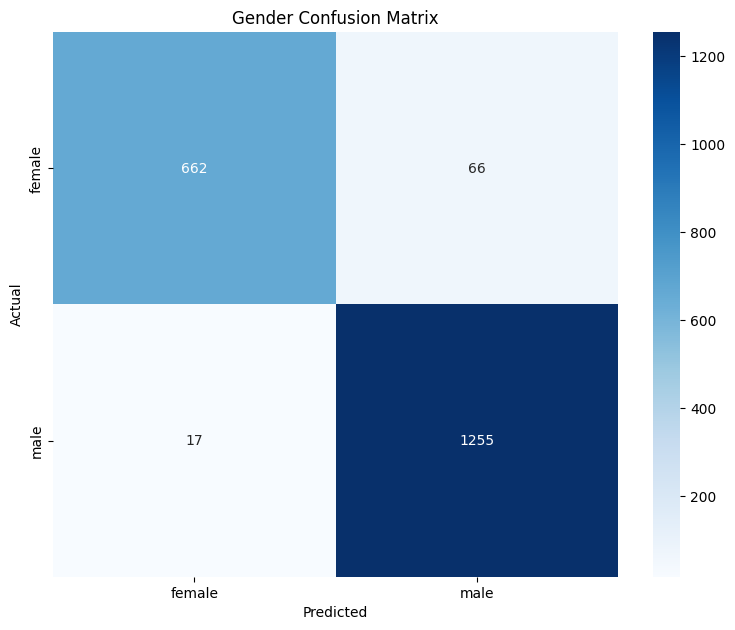

In [17]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Replace df with your actual DataFrame name

# Define all unique classes for each column
gender_classes = sorted(newdata['gender'].unique())


# Confusion matrix for gender
gender_actual = newdata['gender']
gender_predicted = newdata['gender_pred']
gender_conf_matrix = confusion_matrix(gender_actual, gender_predicted, labels=gender_classes)


# Plot confusion matrices
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(gender_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gender_classes, yticklabels=gender_classes)
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [18]:
newdata.head()

,id,gender,age,topic,sign,date,text,gender_encoded,gender_pred,gender_prob
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...,1,male,0.971957
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...,1,male,0.932778
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,1,male,1.000000
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,1,male,0.945505
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...,1,male,0.969002


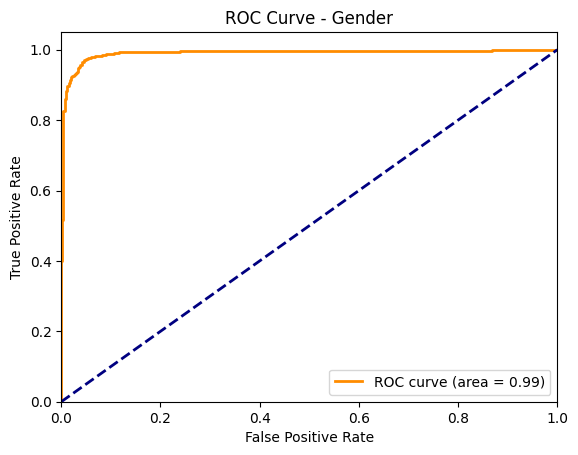

In [19]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def plot_roc_auc(y_true, y_score, column_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + column_name)
    plt.legend(loc="lower right")
    plt.show()

# ROC AUC curve for gender
plot_roc_auc(newdata['gender_encoded'], newdata['gender_prob'], 'Gender')
# plot_roc_auc(new_data['topic_encoded'], new_data['topic_prob'], 'Topic')
# plot_roc_auc(new_data['Sign_encoded'], new_data['Sign_prob'], 'Sign')
# plot_roc_auc(new_data['Age_encoded'], new_data['Age_prob'], 'Age')